__Partendo da questo dataframe su kaggle__
(https://www.kaggle.com/datasets/shivamb/netflix-shows)

1. Caricare i dati in un DataFrame

2. Visualizzare le prime e le ultime cinque righe del DataFrame.

3. Visualizzare il tipo di dati di ciascuna colonna.

4. Calcolare statistiche descrittive di base per le colonne numeriche

5. visualizzare valori mancanti;

6. verificate se ci sono correlazioni

7. create un grafico a mappa di calore.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("netflix_titles.csv")
df.shape

(8807, 12)

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.tail()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
print(df.dtypes)


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [6]:

df.describe()


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df['director'].fillna('unknown', inplace=True)
df['cast'].fillna('unknown', inplace=True)
df['country'].fillna('unknown', inplace=True)

df.isnull().sum()


C:\Users\lauda\AppData\Local\Temp\ipykernel_5484\645373853.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('unknown', inplace=True)
C:\Users\lauda\AppData\Local\Temp\ipykernel_5484\645373853.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

__Partendo dallo stesso Dataframe Netflix scaricato in precedenza, calcolate la media della lunghezza dei prodotti ragguppati per serie e film e realizzate grafici esplicativi.__

In [9]:
df_movies = df[df['type'] == 'Movie'].copy()

df_tvshows = df[df['type'] == 'TV Show'].copy()

print("Film:", df_movies.head)
print("Serie TV:", df_tvshows.head)


Film: <bound method NDFrame.head of      show_id   type                             title  \
0         s1  Movie              Dick Johnson Is Dead   
6         s7  Movie  My Little Pony: A New Generation   
7         s8  Movie                           Sankofa   
9        s10  Movie                      The Starling   
12       s13  Movie                      Je Suis Karl   
...      ...    ...                               ...   
8801   s8802  Movie                           Zinzana   
8802   s8803  Movie                            Zodiac   
8804   s8805  Movie                        Zombieland   
8805   s8806  Movie                              Zoom   
8806   s8807  Movie                            Zubaan   

                           director  \
0                   Kirsten Johnson   
6     Robert Cullen, José Luis Ucha   
7                      Haile Gerima   
9                    Theodore Melfi   
12              Christian Schwochow   
...                             ...   
8801  

In [10]:
# Estrai il numero di minuti dai film
df_movies['duration_int'] = df_movies['duration'].str.extract(r'(\d+)').astype(float)

# Estrai il numero di stagioni dalle serie
df_tvshows['duration_int'] = df_tvshows['duration'].str.extract(r'(\d+)').astype(float)


In [11]:
media_film = df_movies['duration_int'].mean()
media_serie = df_tvshows['duration_int'].mean()

print(f"{media_film:.2f} minuti")
print(f"{media_serie:.2f} stagioni")



99.58 minuti
1.76 stagioni


C:\Users\lauda\AppData\Local\Temp\ipykernel_5484\2532832696.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(media_durata.keys()), y=list(media_durata.values()), palette='pastel')


<Axes: >

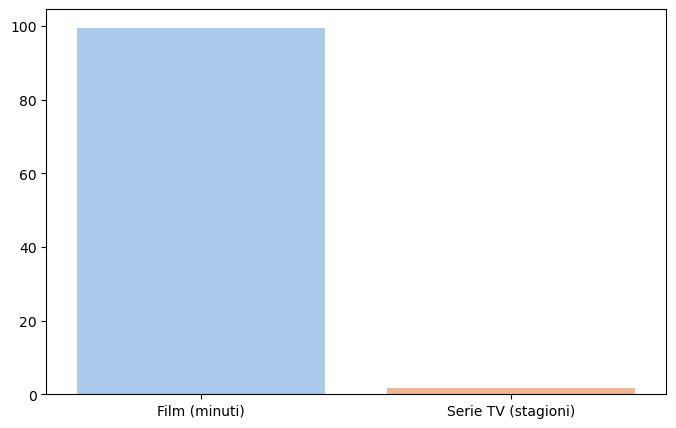

In [12]:

# 1. Creiamo un dizionario con i dati
media_durata = {
    'Film (minuti)': media_film,
    'Serie TV (stagioni)': media_serie
}

# 2. Prepariamo il grafico
plt.figure(figsize=(8, 5))  # dimensione del grafico

# 3. Disegniamo il grafico a barre
sns.barplot(x=list(media_durata.keys()), y=list(media_durata.values()), palette='pastel')



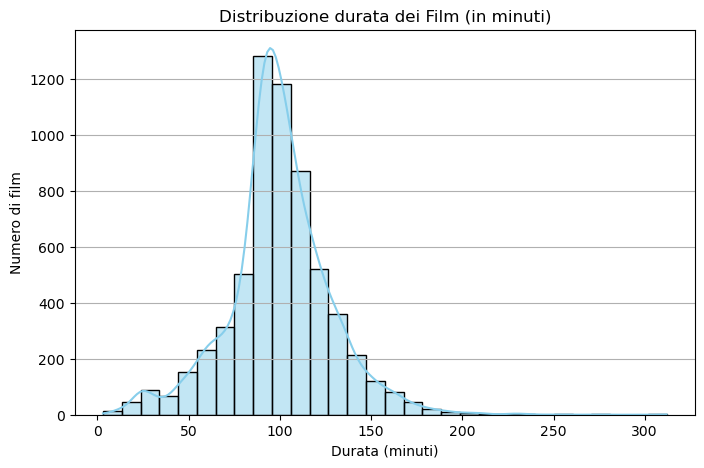

In [13]:

plt.figure(figsize=(8, 5))
sns.histplot(df_movies['duration_int'], bins=30, color='skyblue', kde=True)

plt.title("Distribuzione durata dei Film (in minuti)")
plt.xlabel("Durata (minuti)")
plt.ylabel("Numero di film")
plt.grid(axis='y')
plt.show()


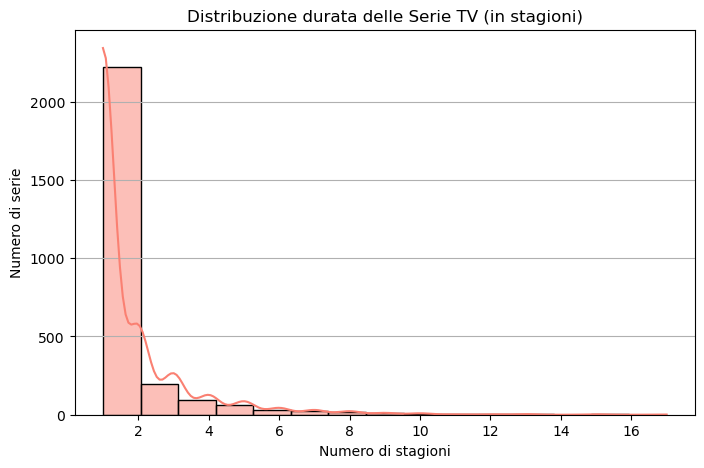

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df_tvshows['duration_int'], bins=15, color='salmon', kde=True)

plt.title("Distribuzione durata delle Serie TV (in stagioni)")
plt.xlabel("Numero di stagioni")
plt.ylabel("Numero di serie")
plt.grid(axis='y')
plt.show()


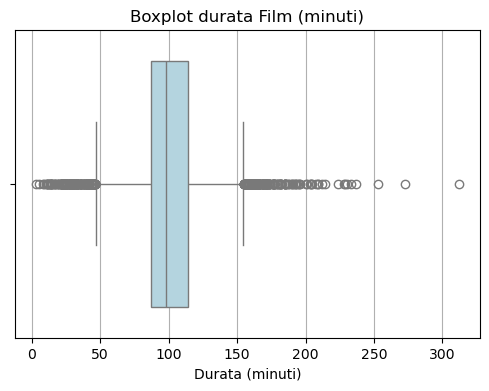

In [15]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_movies['duration_int'], color='lightblue')
plt.title("Boxplot durata Film (minuti)")
plt.xlabel("Durata (minuti)")
plt.grid(axis='x')
plt.show()


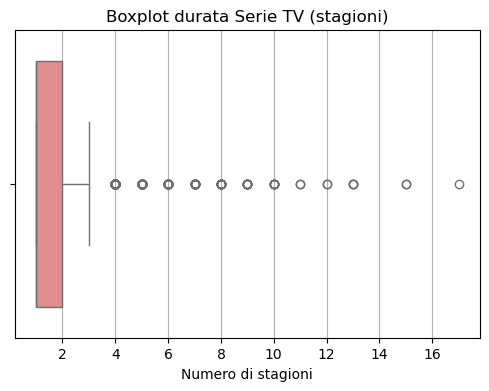

In [16]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_tvshows['duration_int'], color='lightcoral')
plt.title("Boxplot durata Serie TV (stagioni)")
plt.xlabel("Numero di stagioni")
plt.grid(axis='x')
plt.show()


## <mark>Esercizio2</mark>
<h4>Partendo dal Dataframe Netflix scaricato in precedenza eseguite le seguenti analisi:</h4>

- Analisi delle categorie di contenuto:

    - Determina quali sono le categorie più popolari di film e spettacoli televisivi su Netflix.
    - Calcola la distribuzione delle categorie di contenuto e visualizzale graficamente utilizzando un grafico a barre o un grafico a torta.



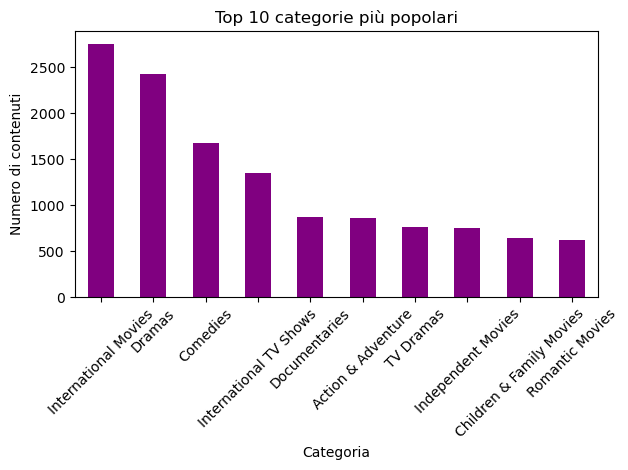

In [17]:
#stack() prende tutte queste colonne e le "impila" in una singola colonna, eliminando i NaN.

categorie = df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10)

categorie.plot(kind='bar', color='purple')
plt.title("Top 10 categorie più popolari")
plt.ylabel("Numero di contenuti")
plt.xlabel("Categoria")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


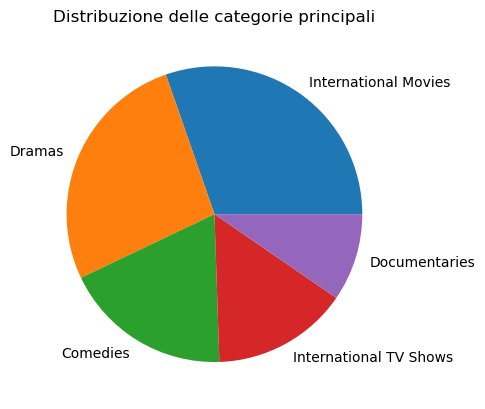

In [18]:
categorie.head(5).plot.pie()
plt.title("Distribuzione delle categorie principali")
plt.ylabel("")
plt.show()


- Esplorazione delle valutazioni:

    - Analizza la distribuzione delle valutazioni dei film e degli spettacoli televisivi su Netflix.
    - Visualizza la distribuzione delle valutazioni utilizzando un istogramma.


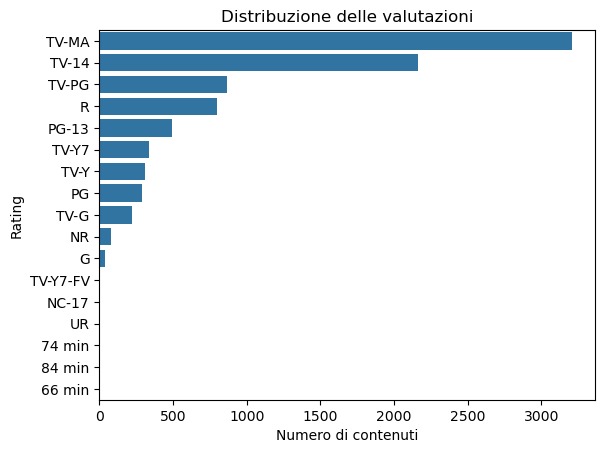

In [19]:
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title("Distribuzione delle valutazioni")
plt.xlabel("Numero di contenuti")
plt.ylabel("Rating")
plt.show()



- Correlazioni tra variabili:

    - Esamina se esiste una correlazione tra il paese di produzione e il genere del contenuto su Netflix.
    - Calcola la correlazione tra la valutazione e l'anno di pubblicazione dei contenuti.


In [20]:
df['first_country'] = df['country'].str.split(',', n=1).str[0].str.strip()


print(df[['country', 'first_country']].head())


         country  first_country
0  United States  United States
1   South Africa   South Africa
2        unknown        unknown
3        unknown        unknown
4          India          India


In [21]:
conteggio_paesi = df['first_country'].value_counts()
print(conteggio_paesi.head())


first_country
United States     3211
India             1008
unknown            831
United Kingdom     628
Canada             271
Name: count, dtype: int64


In [23]:

# Tabella di contingenza
contingenza = pd.crosstab(df['first_country'], df['genre'])

print(contingenza.head())


KeyError: 'genre'

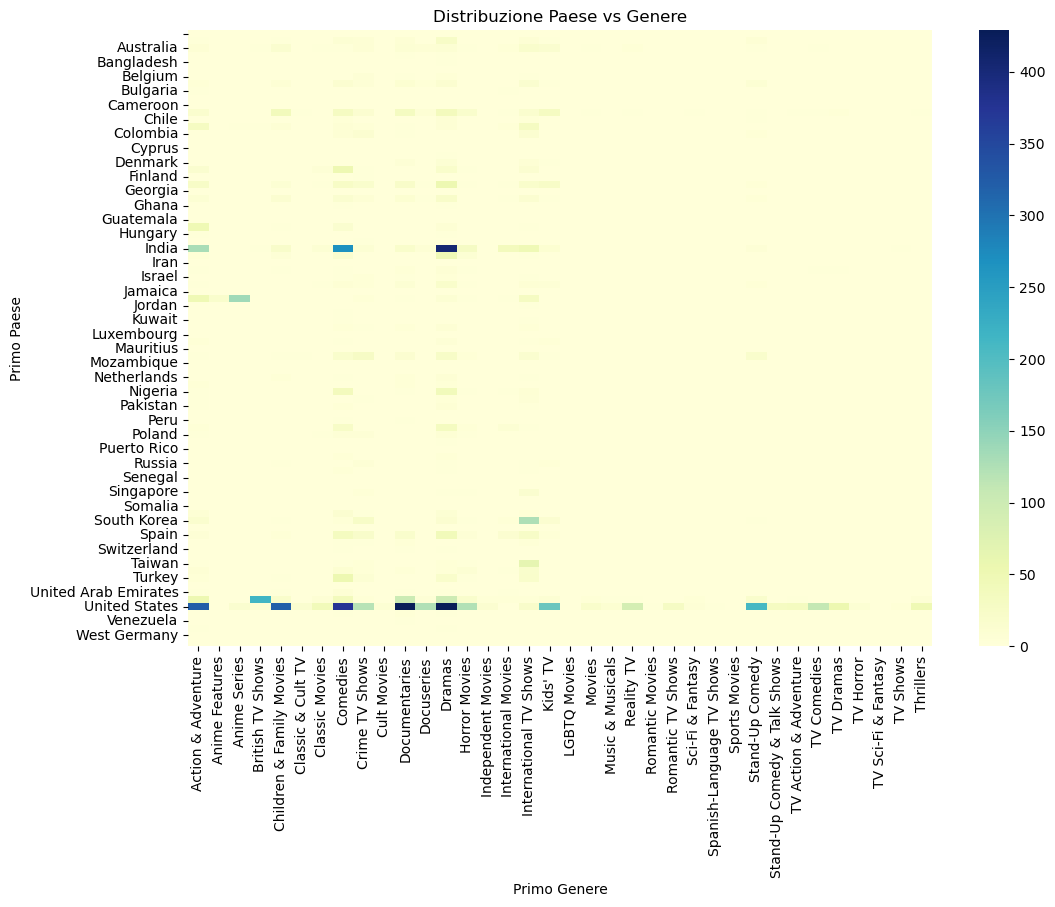

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(contingenza, cmap='YlGnBu')
plt.title("Distribuzione Paese vs Genere")
plt.ylabel("Primo Paese")
plt.xlabel("Primo Genere")
plt.show()


- Analisi temporale:

    - Esplora le tendenze temporali dei contenuti su Netflix in base all'anno di pubblicazione.


              release_year  rating_code
release_year      1.000000     0.247384
rating_code       0.247384     1.000000


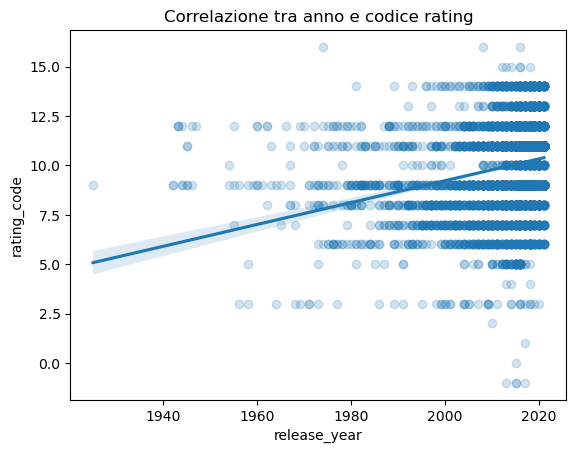

In [ ]:
df_corr = df[['release_year']].copy()
df_corr['rating_code'] = df['rating'].astype('category').cat.codes

print(df_corr.corr())
sns.regplot(data=df_corr, x='release_year', y='rating_code', scatter_kws={'alpha':0.2})
plt.title("Correlazione tra anno e codice rating")
plt.show()


- Visualizza l'andamento nel tempo del numero di contenuti pubblicati su Netflix utilizzando un grafico a linee.




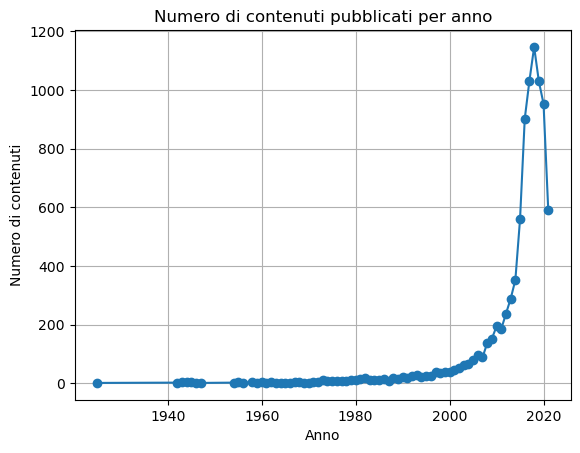

In [ ]:
contenuti_anno = df['release_year'].value_counts().sort_index()

contenuti_anno.plot(kind='line', marker='o')
plt.title("Numero di contenuti pubblicati per anno")
plt.xlabel("Anno")
plt.ylabel("Numero di contenuti")
plt.grid(True)
plt.show()


- Analisi delle distribuzioni geografiche:

    -  Esamina la distribuzione geografica dei contenuti su Netflix in base al paese di produzione.
    - Visualizza la distribuzione geografica utilizzando una mappa o un grafico a barre.


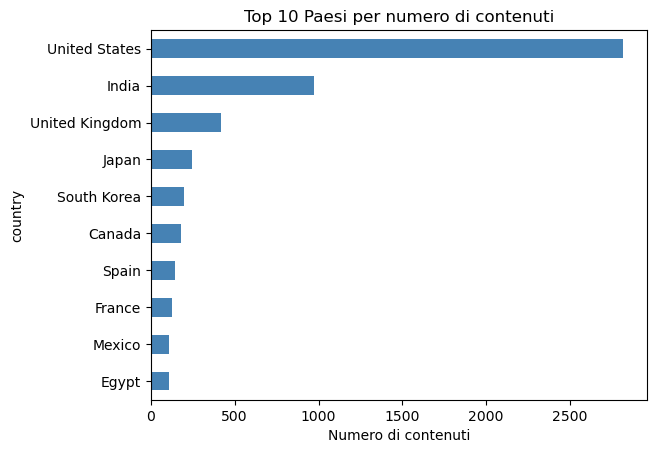

In [ ]:
top_paesi = df['country'].value_counts().head(10)
top_paesi.plot(kind='barh', color='steelblue')
plt.title("Top 10 Paesi per numero di contenuti")
plt.xlabel("Numero di contenuti")
plt.gca().invert_yaxis()
plt.show()


- Esplorazione delle serie TV:

    - Analizza la distribuzione delle serie TV rispetto ai film su Netflix.
    - Calcola la durata media delle serie TV e dei film e confrontali.

C:\Users\lauda\AppData\Local\Temp\ipykernel_29368\484978643.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set1')


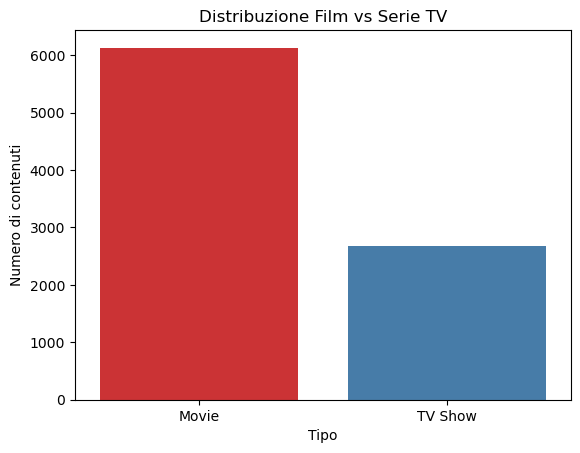

In [ ]:
sns.countplot(x='type', data=df, palette='Set1')
plt.title("Distribuzione Film vs Serie TV")
plt.ylabel("Numero di contenuti")
plt.xlabel("Tipo")
plt.show()


Confronto durata media


In [ ]:
print(f"Durata media FILM: {df_movies['duration_int'].mean():.2f} minuti")
print(f"Durata media SERIE: {df_tvshows['duration_int'].mean():.2f} stagioni")


Durata media FILM: 99.58 minuti
Durata media SERIE: 1.76 stagioni
